## Concrete Strength Prediction with Neural Networks

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Creating own data with scikit learn

In [2]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_features=30, n_samples=5000, noise=10, random_state=42)
X

array([[ 0.73579588,  1.04112706, -0.87140389, ..., -1.28557712,
         0.8309933 , -1.58487991],
       [-0.108076  ,  2.32106851,  2.29221164, ...,  0.68131372,
        -2.40173397, -1.18387309],
       [ 0.30806463, -0.82467886,  1.38549697, ...,  1.4745775 ,
        -0.86784344, -0.11117936],
       ...,
       [ 0.46886758,  0.94334516,  0.44395667, ...,  1.35342463,
         0.09998062, -0.7785281 ],
       [ 0.75775478,  0.43412698, -0.12148711, ..., -0.97502138,
         1.3888001 ,  0.36543184],
       [-0.11071739, -0.60025471, -0.13589803, ...,  0.00344785,
         1.33576046,  1.48514776]])

In [3]:
X.shape

(5000, 30)

In [4]:
Y.shape

(5000,)

In [5]:
cols = [f'x{i}' for i in range(30)]
cols

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29']

In [6]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = cols
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.735796,1.041127,-0.871404,0.508606,-0.636648,1.332272,-0.503400,1.374134,1.270885,1.988603,...,0.317767,2.951914,-0.248546,-0.870800,-1.569923,0.395626,1.066135,-1.285577,0.830993,-1.584880
1,-0.108076,2.321069,2.292212,1.122974,0.558116,-0.328548,1.750118,-0.534911,0.213996,0.364157,...,0.081067,0.497429,0.824820,0.205803,-0.622931,-0.853174,0.924574,0.681314,-2.401734,-1.183873
2,0.308065,-0.824679,1.385497,1.927543,0.236301,0.562039,0.465317,-1.171702,0.346263,-0.152707,...,-0.834410,-1.240574,-0.722814,-0.107633,0.424254,-1.886220,2.157491,1.474577,-0.867843,-0.111179
3,-0.837979,-0.001572,-0.879153,-0.215569,0.108785,1.122969,-1.351074,0.652168,-0.142286,-0.348107,...,-0.861413,-1.071020,0.300968,-0.835940,0.410507,-0.308762,0.009512,1.576850,-0.367144,-0.796132
4,-0.252247,-0.407280,1.432967,-0.489814,-0.154190,0.385624,1.356910,1.209124,2.927645,-0.156261,...,-0.318957,3.536532,1.391892,0.385200,-0.620109,1.764385,-0.765251,0.003286,0.170299,-0.905189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531823,-0.753699,-0.526386,-0.134938,-0.572953,-0.259428,-0.491569,-0.442929,0.767339,-0.807009,...,-0.451589,-2.689713,0.236172,-2.629400,1.804714,0.158483,0.457955,0.665615,1.110167,0.672384
4996,0.378681,0.842819,-0.146172,-1.625534,-0.955834,0.185233,-1.016409,1.275818,-1.631155,-1.343036,...,0.096142,0.726612,-0.280988,-0.070456,1.671552,-0.261690,1.142516,-0.998338,0.523002,1.496653
4997,0.468868,0.943345,0.443957,-0.671411,-0.117502,0.544626,0.348450,0.553522,0.505444,-0.346620,...,0.378791,0.449205,0.890035,-1.157446,0.979357,0.497428,-0.312307,1.353425,0.099981,-0.778528
4998,0.757755,0.434127,-0.121487,-0.217615,-0.088260,-0.355547,-0.803803,0.893347,0.145759,-1.258296,...,-0.441476,1.075934,0.511556,0.737071,1.306280,1.712308,-1.226916,-0.975021,1.388800,0.365432


In [7]:
Y=pd.DataFrame(Y)
Y.columns = ['Y']
Y

,Y
0,150.973830
1,34.772072
2,-254.332036
3,67.563592
4,371.994270
...,...
4995,-75.457805
4996,214.869422
4997,281.812602
4998,197.266648


### Create preprocessing pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.74522802,  1.05648626, -0.90506965, ..., -1.30803257,
         0.84170597, -1.57717141],
       [-0.10350458,  2.31911253,  2.31665157, ...,  0.67291129,
        -2.37529169, -1.17462579],
       [ 0.31503302, -0.78407885,  1.3932834 , ...,  1.47184277,
        -0.84886467, -0.09781578],
       ...,
       [ 0.47676221,  0.96002717,  0.43444996, ...,  1.3498243 ,
         0.11425021, -0.76772536],
       [ 0.7673134 ,  0.45769774, -0.14137924, ..., -0.99525798,
         1.39679863,  0.38062434],
       [-0.10616118, -0.56269073, -0.15605485, ..., -0.00979779,
         1.34401706,  1.50463697]])

In [11]:
cols = num_pipe.get_feature_names_out()
cols

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29'], dtype=object)

In [12]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
0,0.745228,1.056486,-0.905070,0.519462,-0.639618,1.338450,-0.481092,1.363730,1.263597,1.958957,...,0.327146,2.928869,-0.272461,-0.845469,-1.578828,0.378638,1.069910,-1.308033,0.841706,-1.577171
1,-0.103505,2.319113,2.316652,1.141287,0.551350,-0.326713,1.759410,-0.546866,0.203975,0.352701,...,0.088325,0.492024,0.809076,0.194107,-0.632590,-0.855621,0.928962,0.672911,-2.375292,-1.174626
2,0.315033,-0.784079,1.393283,1.955622,0.230558,0.566203,0.482029,-1.184175,0.336584,-0.158376,...,-0.835351,-1.233488,-0.750340,-0.108549,0.413763,-1.876639,2.156540,1.471843,-0.848865,-0.097816
3,-0.837612,0.027893,-0.912961,-0.213504,0.103447,1.128600,-1.323870,0.641177,-0.153228,-0.351588,...,-0.862595,-1.065153,0.281236,-0.811807,0.400026,-0.317548,0.017862,1.574846,-0.350601,-0.785396
4,-0.248506,-0.372327,1.441625,-0.491078,-0.158693,0.389326,1.368473,1.198586,2.924641,-0.161889,...,-0.315281,3.509286,1.380466,0.367333,-0.629769,1.731461,-0.753547,-0.009961,0.184226,-0.894872


### Train Test split
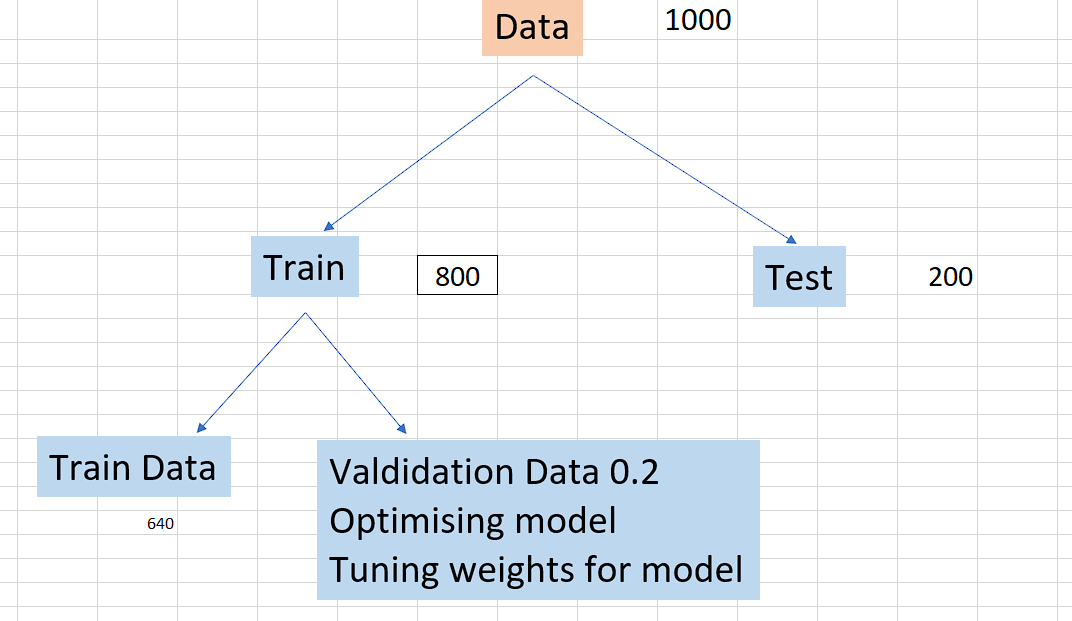

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest  = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [14]:
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
4227,-1.711500,-0.974283,2.148708,1.146298,0.005667,0.195566,-0.383993,-0.718080,0.386160,0.836130,...,-0.038466,-0.586292,-0.755515,1.123953,0.481978,-0.486258,0.334790,0.492318,-0.331858,-0.342493
4676,0.172312,-0.970151,-1.179572,-0.638740,-0.422951,0.177145,0.573145,1.813015,-1.607622,-0.210241,...,0.634777,1.713791,-0.022969,-0.378341,0.832926,-0.503255,0.237117,-0.149347,0.496145,0.754362
800,-1.492289,1.229383,-0.018078,-0.330406,-0.371915,1.970379,-0.418413,0.938733,-2.671832,0.913192,...,1.204552,0.116447,-1.738264,-1.584350,0.806748,0.271933,0.243712,1.454942,-0.461815,-1.043920
3671,0.915208,-0.514593,0.540443,-1.099790,2.368460,-0.297468,-0.562002,0.908696,-1.896036,-0.194337,...,-1.940698,-0.578662,0.707078,0.542981,-0.463365,-0.548334,-1.093015,0.286737,-1.080500,0.341760
4193,-0.887632,0.544564,-0.925896,0.256488,-1.976681,-0.632713,-0.212875,-1.303906,-0.842213,1.017362,...,-1.244223,0.173869,-1.161800,-0.959832,0.309585,-0.131386,-1.678463,-1.296317,-0.200358,0.692108


In [15]:
xtest.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
1501,-0.681669,-0.281059,2.761616,-1.400011,-1.530909,-0.691941,-0.345960,-1.165733,-0.977374,1.478053,...,0.065161,-0.574885,1.219792,-0.408543,0.410107,0.152741,-0.649394,-0.099675,-0.689437,0.316981
2586,-0.324089,-0.272152,0.131552,1.071197,-0.411231,-0.624608,-0.307337,-0.742311,-0.385733,0.749045,...,-0.022851,0.211214,-0.328267,0.025272,0.292487,1.457876,-0.003496,-1.953557,-1.208221,1.142259
2653,1.266622,0.356315,-2.476023,-0.637571,-0.971267,0.664652,0.223826,-0.643297,1.608720,2.256304,...,-0.898993,-1.080242,0.006157,1.155127,2.669230,-1.679951,1.550418,0.778363,-0.765626,-1.815478
1055,1.352776,-0.123473,-0.496008,0.493306,0.947843,0.275741,-0.338589,-1.573045,-2.225637,0.621801,...,1.037722,1.577578,-1.077313,-1.397536,-0.502970,0.760472,-1.593517,0.063864,-0.829425,1.452322
705,-0.669097,0.582714,0.583174,-0.958410,0.875485,0.029174,0.370883,1.022421,1.194240,-0.798537,...,-0.772146,-1.593999,0.447282,0.945441,-0.336529,1.797089,1.423586,0.315882,-1.119409,1.249510


In [16]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [17]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


In [18]:
xtrain.shape

(4000, 30)

In [19]:
xtest.shape

(1000, 30)

In [20]:
xtrain.shape[1]

30

### Create a Neural network
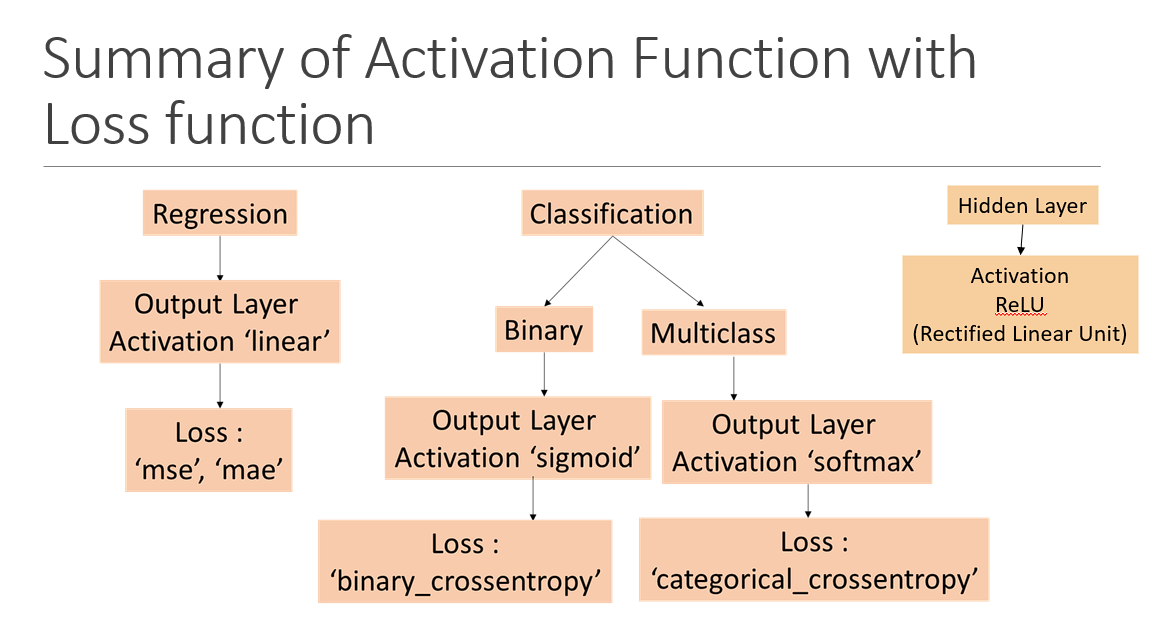

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Initialize Sequential Model
model = Sequential()

# Create Hidden Layer 1
model.add(Dense(units=32, activation='relu', input_dim=xtrain.shape[1]))

# Create Hidden Layer 2
model.add(Dense(units=16, activation='relu'))

# Create Hidden Layer 3
model.add(Dense(units=8, activation='relu'))

# Create output Layer
model.add(Dense(units=1, activation='linear'))

### Compile the model

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Fit the model

In [24]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


100/100 [==============================] - 8s 16ms/step - loss: 31060.5371 - mae: 141.3817 - val_loss: 30545.1582 - val_mae: 141.8012
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 29010.7422 - mae: 136.2018 - val_loss: 25761.8105 - val_mae: 129.4194
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 18929.0059 - mae: 105.3466 - val_loss: 10418.3164 - val_mae: 74.8784
Epoch 4/100
100/100 [==============================] - 1s 7ms/step - loss: 4306.3765 - mae: 41.9043 - val_loss: 1137.3671 - val_mae: 24.8471
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 647.0698 - mae: 18.9127 - val_loss: 443.9907 - val_mae: 16.4534
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 328.3174 - mae: 14.0382 - val_loss: 318.7439 - val_mae: 14.1345
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 263.3939 - mae: 12.7493 - val_loss: 284.6987 - val_mae: 13.2897
Epoch

In [25]:
hist.history['loss']

[31060.537109375,
 29010.7421875,
 18929.005859375,
 4306.37646484375,
 647.0697631835938,
 328.3173522949219,
 263.3939208984375,
 240.82183837890625,
 228.4989776611328,
 218.15902709960938,
 212.11349487304688,
 204.32260131835938,
 196.18226623535156,
 189.62152099609375,
 183.5041961669922,
 177.98867797851562,
 173.15109252929688,
 162.87826538085938,
 159.1011962890625,
 152.62619018554688,
 147.84690856933594,
 142.02569580078125,
 138.48846435546875,
 133.200439453125,
 128.0419464111328,
 124.91175842285156,
 120.45755767822266,
 117.34890747070312,
 113.92261505126953,
 113.89312744140625,
 110.40586853027344,
 107.52804565429688,
 105.81343841552734,
 103.60635375976562,
 102.08062744140625,
 102.19229125976562,
 99.5271224975586,
 97.2369155883789,
 96.22489166259766,
 95.82759857177734,
 94.18904113769531,
 93.3687973022461,
 92.92424774169922,
 91.6368179321289,
 89.91319274902344,
 90.1167984008789,
 89.47106170654297,
 88.80731201171875,
 87.82318115234375,
 87.7040939

In [26]:
hist.history['val_loss']

[30545.158203125,
 25761.810546875,
 10418.31640625,
 1137.3670654296875,
 443.9906921386719,
 318.743896484375,
 284.6986999511719,
 271.7430725097656,
 256.1278076171875,
 250.88809204101562,
 249.97483825683594,
 239.75489807128906,
 236.8861083984375,
 229.6842041015625,
 225.21949768066406,
 233.0220489501953,
 215.54025268554688,
 206.37612915039062,
 202.13121032714844,
 196.7579345703125,
 194.5677490234375,
 187.15771484375,
 190.00048828125,
 182.7291259765625,
 177.93687438964844,
 175.48855590820312,
 173.9013671875,
 168.49652099609375,
 168.15513610839844,
 161.03021240234375,
 164.34034729003906,
 158.20025634765625,
 161.52310180664062,
 160.40553283691406,
 158.324462890625,
 149.94198608398438,
 148.34164428710938,
 148.71231079101562,
 150.0416259765625,
 147.08895874023438,
 151.66575622558594,
 148.1694793701172,
 145.2350616455078,
 144.18260192871094,
 144.08433532714844,
 147.88934326171875,
 145.01869201660156,
 143.10223388671875,
 144.4486083984375,
 144.0965

In [27]:
hist.history['mae']

[141.38168334960938,
 136.20175170898438,
 105.34661865234375,
 41.90426254272461,
 18.912656784057617,
 14.038189888000488,
 12.74925422668457,
 12.208208084106445,
 11.960471153259277,
 11.675559997558594,
 11.530691146850586,
 11.306888580322266,
 11.13261604309082,
 10.89167594909668,
 10.741815567016602,
 10.60580062866211,
 10.43371868133545,
 10.174379348754883,
 10.003382682800293,
 9.823694229125977,
 9.633856773376465,
 9.482930183410645,
 9.365078926086426,
 9.168529510498047,
 9.009456634521484,
 8.920072555541992,
 8.735816955566406,
 8.620327949523926,
 8.490920066833496,
 8.500638008117676,
 8.343990325927734,
 8.240545272827148,
 8.15282917022705,
 8.071861267089844,
 7.975325107574463,
 8.017827033996582,
 7.924034595489502,
 7.780900478363037,
 7.777032375335693,
 7.769455432891846,
 7.707720756530762,
 7.647313117980957,
 7.625114917755127,
 7.573065280914307,
 7.508733749389648,
 7.521090030670166,
 7.484353065490723,
 7.473172664642334,
 7.4103217124938965,
 7.4052

In [28]:
hist.history['val_mae']

[141.8011932373047,
 129.41940307617188,
 74.87841033935547,
 24.84705352783203,
 16.453445434570312,
 14.13454818725586,
 13.289724349975586,
 13.102129936218262,
 12.668044090270996,
 12.577532768249512,
 12.551907539367676,
 12.261247634887695,
 12.184144020080566,
 11.961215019226074,
 11.850987434387207,
 12.079639434814453,
 11.548282623291016,
 11.309139251708984,
 11.144133567810059,
 10.975590705871582,
 10.958601951599121,
 10.698284149169922,
 10.888051986694336,
 10.482417106628418,
 10.385387420654297,
 10.296064376831055,
 10.266432762145996,
 10.154354095458984,
 10.128284454345703,
 9.874336242675781,
 9.918221473693848,
 9.75204086303711,
 9.86235523223877,
 9.813490867614746,
 9.751341819763184,
 9.55954360961914,
 9.539597511291504,
 9.523772239685059,
 9.519540786743164,
 9.469775199890137,
 9.727394104003906,
 9.477725982666016,
 9.40140438079834,
 9.402481079101562,
 9.345235824584961,
 9.539767265319824,
 9.41170597076416,
 9.342850685119629,
 9.389820098876953,


### Plot the learning curve

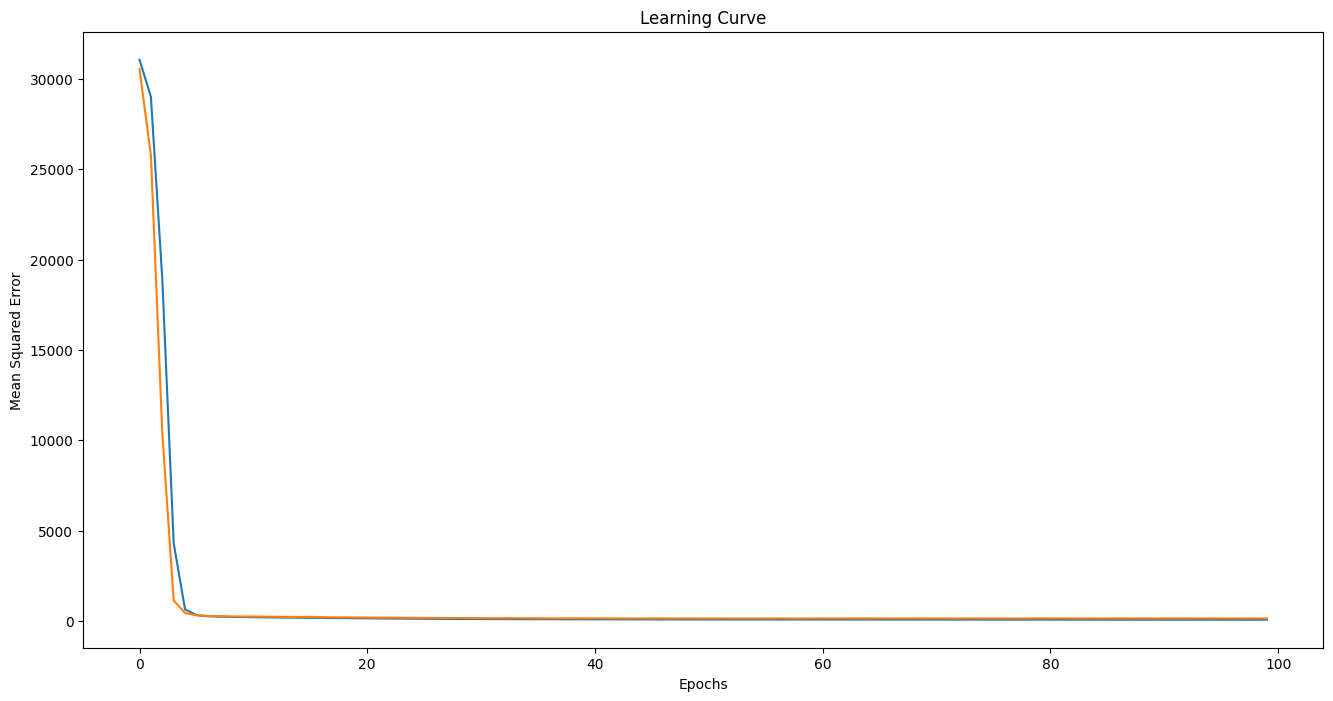

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(hist.history['loss'], label='Training MSE')
plt.plot(hist.history['val_loss'], label='Valdiation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

### Predict values for train and test

In [30]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 5ms/step


In [31]:
ypred_tr[0:5]

array([[ -52.70104],
       [ -68.22134],
       [-324.84766],
       [-281.5026 ],
       [-284.89038]], dtype=float32)

In [32]:
ytrain.head()

,Y
4227,-56.089296
4676,-84.673738
800,-317.290236
3671,-281.509789
4193,-274.629618


In [33]:
ypred_ts[0:5]

array([[-203.44235 ],
       [ -69.65695 ],
       [  66.48924 ],
       [-282.85956 ],
       [  15.268317]], dtype=float32)

In [34]:
ytest.head()

,Y
1501,-193.262454
2586,-76.344635
2653,60.838159
1055,-269.853318
705,29.186902


### Evaluate model based on different metrics

In [35]:
model.evaluate(xtrain, ytrain)

125/125 [==============================] - 1s 9ms/step - loss: 83.4048 - mae: 7.1098


[83.40475463867188, 7.109837532043457]

In [36]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 1s 16ms/step - loss: 135.6325 - mae: 9.2148


[135.63246154785156, 9.21475887298584]

### Check r2 score for train and test

In [37]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_tr)

0.9973241096747439

In [38]:
r2_score(ytest, ypred_ts)

0.9957033492601229

### Save the above model

In [39]:
model.save('RegressionModel.keras')

### Load The model

In [40]:
from keras.models import load_model

In [41]:
nn = load_model('RegressionModel.keras')
nn

In [42]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
